## 索罗增长模型

$$k_{t+1} = \frac{szk_t^{\alpha} + (1-\delta)k_t}{1+n}
$$

In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
class Solow:
    #default parameter
    def __init__(self, n = 0.05,
                       s = 0.25, # saving rate
                       delta = 0.1, # depreciation rate
                       alpha = 0.3, #capital's share of income
                       z = 2.0, # productivity parameter
                       k = 1.0 # current per capita captital stock
                    ):
                 self.n = n;
                 self.s = s;
                 self.z = z;
                 self.alpha = alpha;
                 self.delta = delta;
                 
                 self.k = k;
                 
    def growth_formula(self):
                 n = self.n;
                 z = self.z;
                 s = self.s;
                 alpha = self.alpha;
                 delta = self.delta;
                # the right_hand_side of the equation
                 next_capital_stock = (s*z*(self.k ** alpha) + (1-delta) * self.k)/(1+n);
                 return next_capital_stock;
                 
                
    def update(self):
                 self.k = self.growth_formula();
                 ## no return here ,just an inner update
    def steady_state(self):
                 n = self.n;
                 z = self.z;
                 s = self.s;
                 alpha = self.alpha;
                 delta = self.delta;
                 ss = ((s*z) / (n+delta)) ** (1/(1-alpha));
                 return ss;
    def generate_sequence_of_CapitalStock(self, length_of_time):
                 # create an empty list
                 sequence = [];
                 for i in range(length_of_time):
                     sequence.append(self.k);
                     self.update();
                 return sequence;
                    

<IPython.core.display.Javascript object>


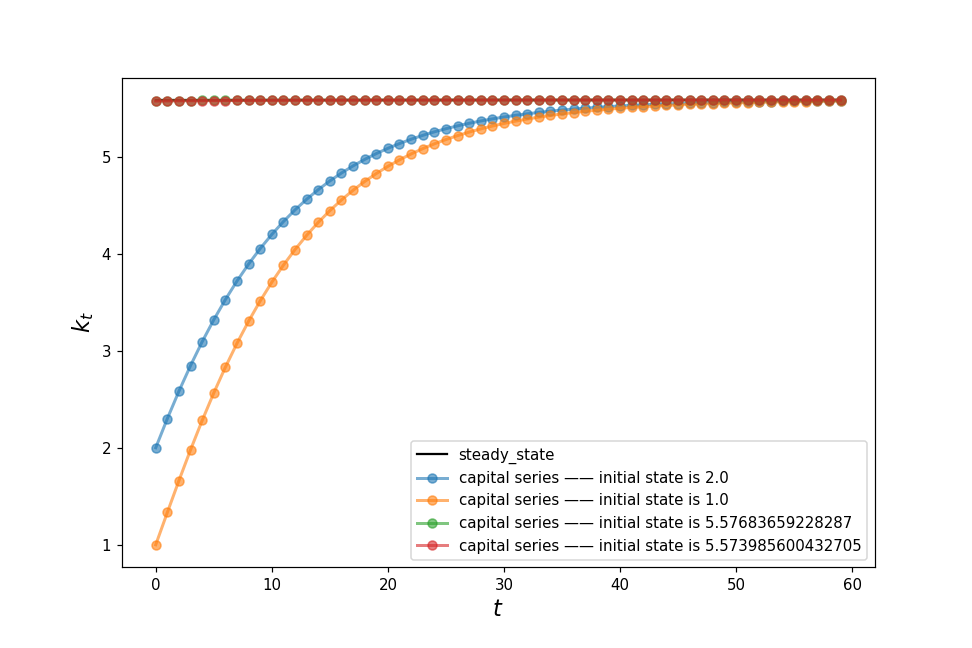

In [3]:
import matplotlib.pyplot as plt


eco_body1 = Solow(k = 2.0);
eco_body2 = Solow();

# sixty unit time_length
T = 60;

figure_size = (9,6);
fig, ax = plt.subplots(figsize = figure_size);

In [4]:
import numpy as np

In [5]:
# x = np.linspace(0, 2, 100)
# # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
# fig, ax = plt.subplots() # Create a figure and an axes.
# ax.plot(x, x, label='linear') # Plot some data on the axes.
# ax.plot(x, x**2, label='quadratic') # Plot more data on the axes...
# ax.plot(x, x**3, label='cubic') # ... and some more.
# ax.set_xlabel('x label') # Add an x-label to the axes.
# ax.set_ylabel('y label') # Add a y-label to the axes.
# ax.set_title("Simple Plot") # Add a title to the axes.
# ax.legend() # Add a legend.

In [6]:
## steady-state
ss = eco_body1.steady_state();
ss

5.5843115041821845

In [7]:
ax.plot([ss]*T, 'k-', label = 'steady_state');

In [8]:
plt.show()

In [11]:
for eco_body in eco_body1,eco_body2:
    label = f'capital series —— initial state is {eco_body.k}'
    ax.plot(eco_body.generate_sequence_of_CapitalStock(T), 'o-',lw = 2,alpha = 0.6, label = label);
    
ax.set_xlabel('$t$', fontsize = 15);
ax.set_ylabel("$k_t$", fontsize = 15);

ax.legend();

plt.show();